In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gamma_spectroscopy_functions import fit_peak, determine_resolution

# Read raw data from file

In [2]:
y = np.genfromtxt("histogram-20240222-212308.hst")
x = np.arange(len(y))

# Plot raw data

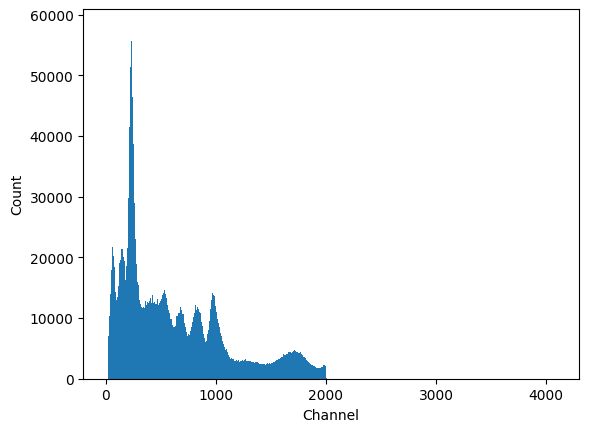

In [3]:
plt.bar(x, y, width=1)
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

# Cut data to relevant range and create smoothed dataset

In [4]:
y = y[:2048]
x = x[:2048]
data = [x,y]

# Compare normalised dataset to the reference dataset used for it's generation with the RedPitaya

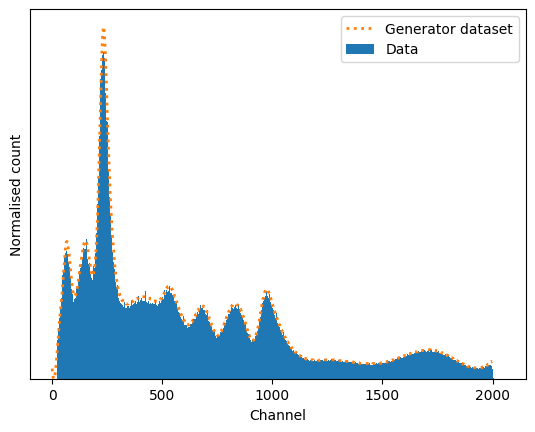

In [5]:
gen = np.genfromtxt("Ra226.gen")
plt.bar(x, y/np.max(y), width = 1, label = "Data")
plt.plot(np.arange(len(gen))/2.05,gen/np.max(gen), linestyle = 'dotted', linewidth = 2, label = "Generator dataset", color = 'tab:orange')
plt.xlabel("Channel")
plt.ylabel("Normalised count")
plt.yticks([])
plt.legend()
plt.show()

# Fit individual peaks with a Gaussian by 'guessing' the x-range and baseline

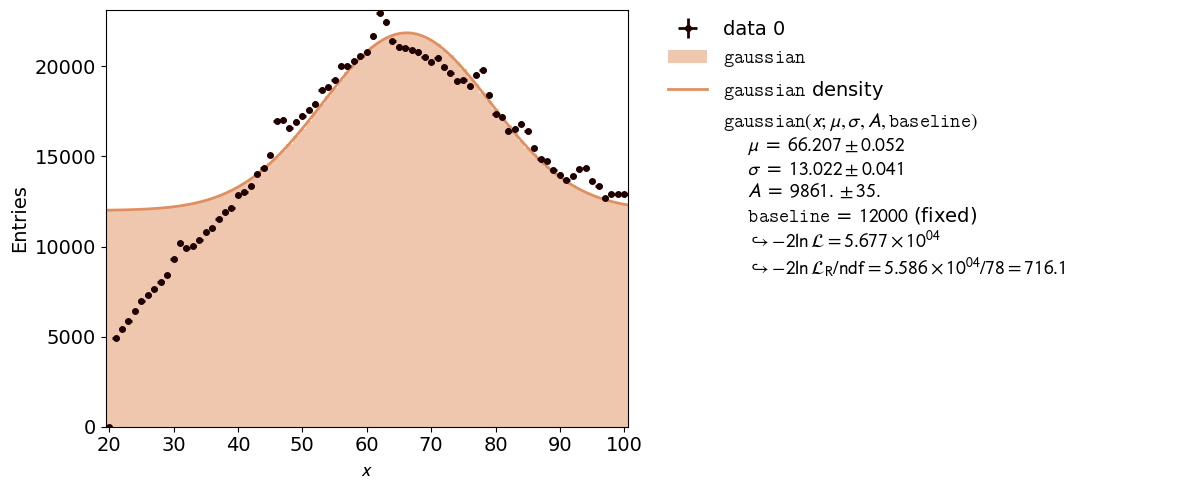

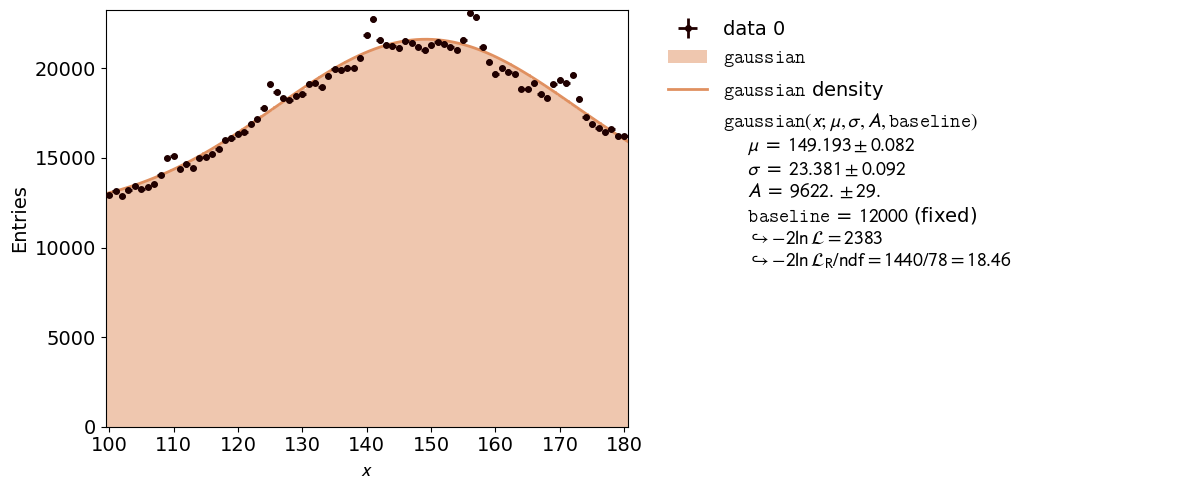

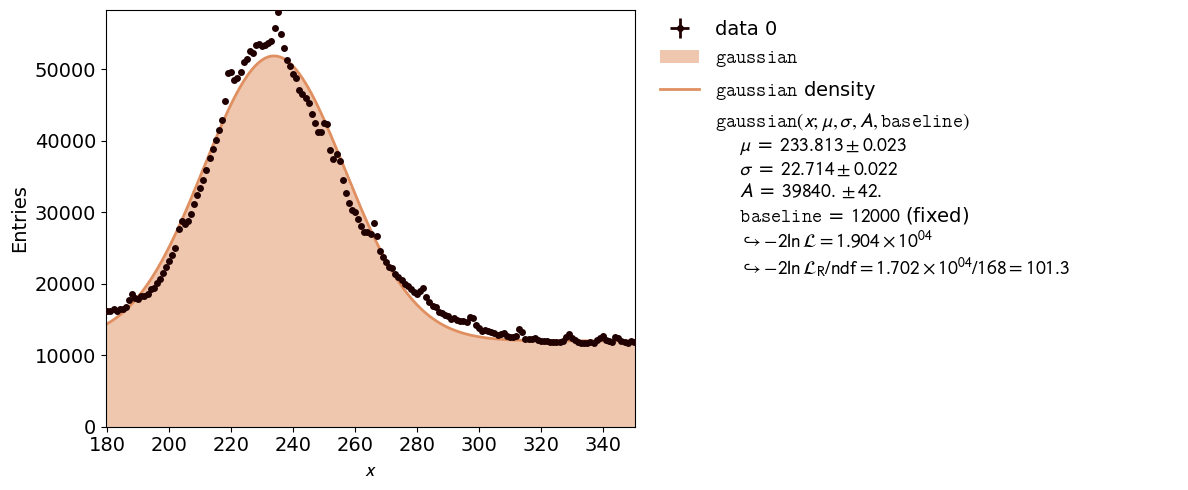

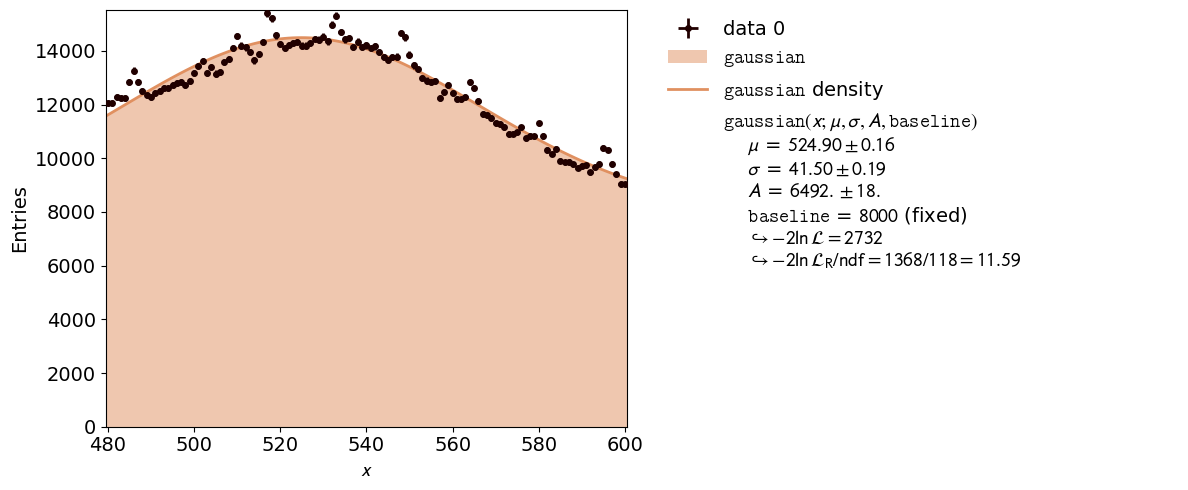

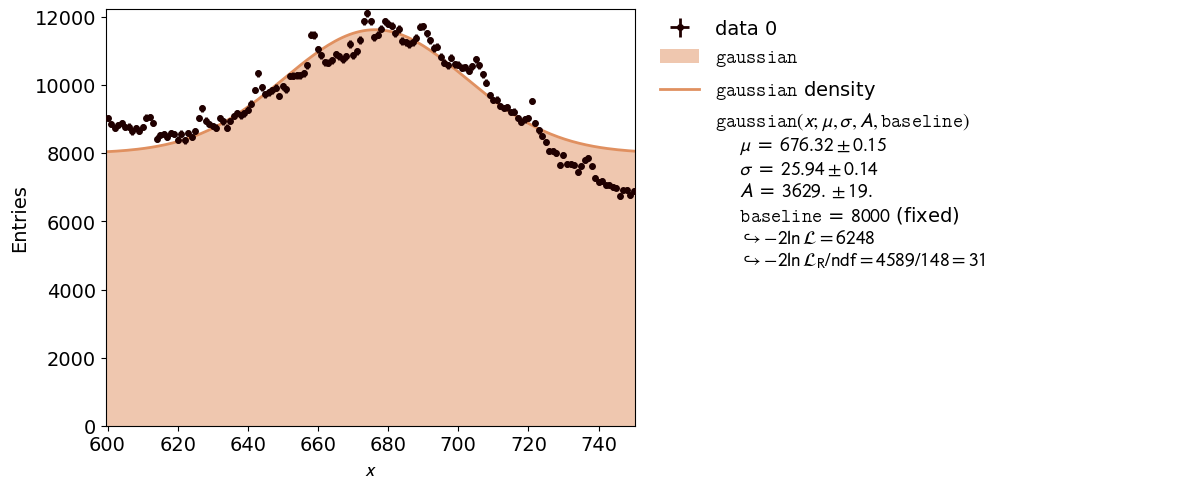

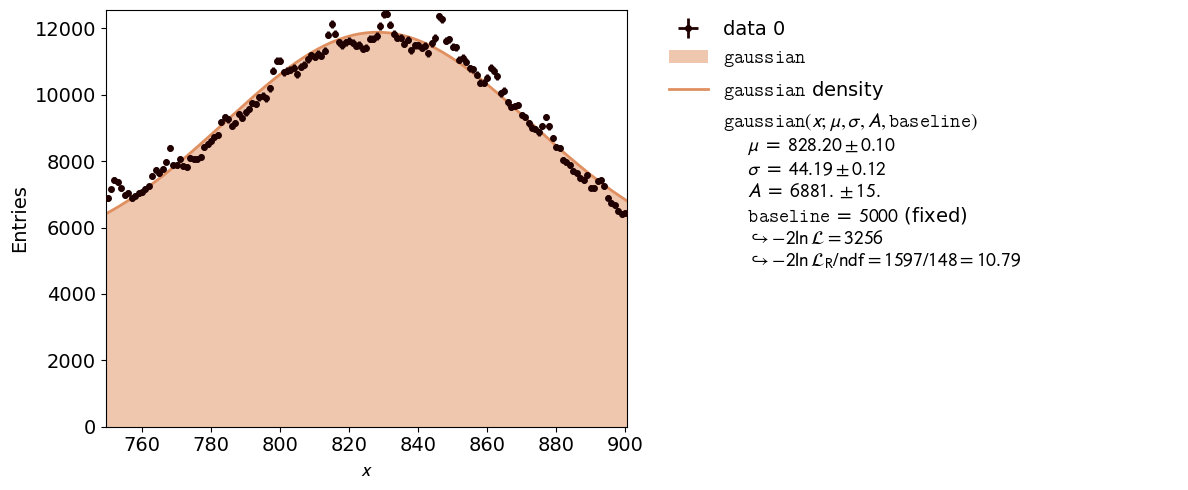

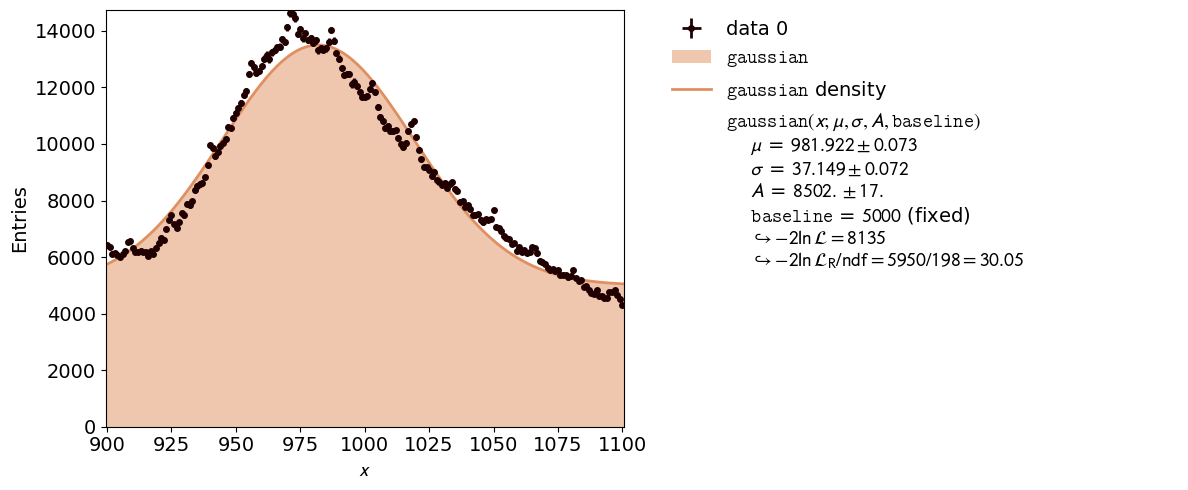

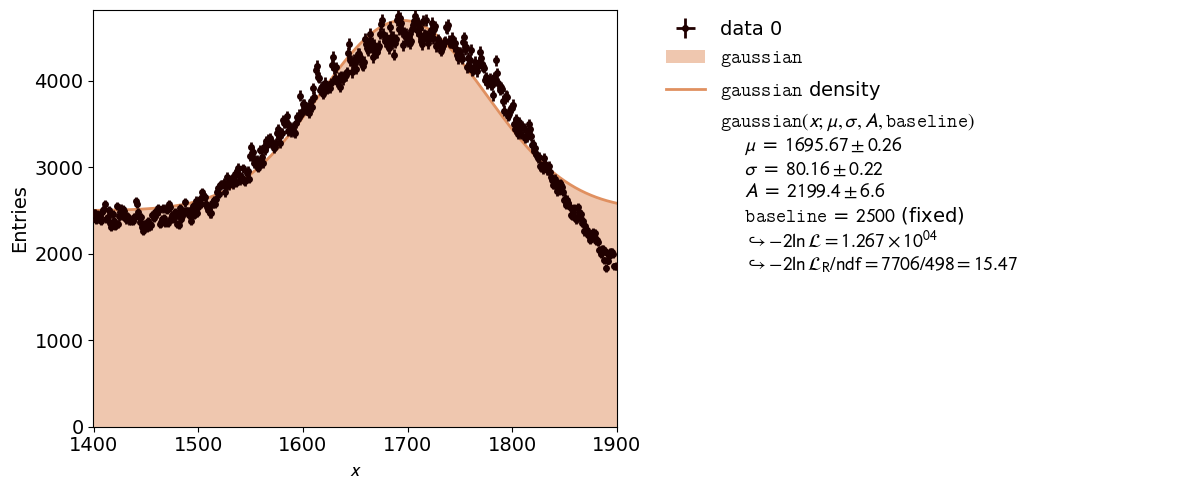

In [6]:
showfits = True

peakfits = []
peakfits.append(fit_peak(data, 20, 100, baseline = 12000, showResult = showfits))
peakfits.append(fit_peak(data, 100, 180, baseline = 12000, showResult = showfits))
peakfits.append(fit_peak(data, 180, 350, baseline = 12000, showResult = showfits))
peakfits.append(fit_peak(data, 480, 600, baseline = 8000, showResult = showfits))
peakfits.append(fit_peak(data, 600, 750, baseline = 8000, showResult = showfits))
peakfits.append(fit_peak(data, 750, 900, baseline = 5000, showResult = showfits))
peakfits.append(fit_peak(data, 900, 1100, baseline = 5000, showResult = showfits))
peakfits.append(fit_peak(data, 1400, 1900, baseline = 2500, showResult = showfits))

peaks = [fit.parameter_values[0] for fit in peakfits]

# Label the individual peaks of the Ra226 spectrum

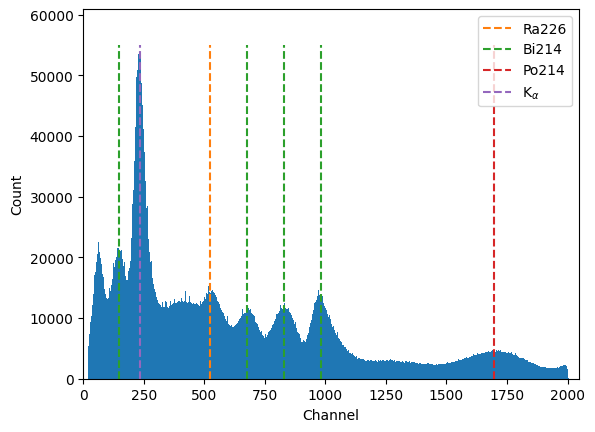

In [7]:
plt.bar(*data, width = 1)
plt.xlabel("Channel")
plt.ylabel("Count")
plt.vlines(peaks[3], 0, 55000, linestyle = '--', label = "Ra226", color = "tab:orange")
plt.vlines([peaks[1]] + peaks[4:7], 0, 55000, linestyle = '--', label = "Bi214", color = "tab:green")
plt.vlines(peaks[-1], 0, 55000, linestyle = '--', label = "Po214", color = "tab:red")
plt.vlines(peaks[2], 0, 55000, linestyle = '--', label = "K$_{{\\alpha}}$", color = "tab:purple")
plt.legend()
plt.xlim(0,2048)
plt.show()

# Plot the detector resolution as a function of energy

/home/ustta/Gamma_new/gamma_spectroscopy_functions.py:49: RuntimeWarning: invalid value encountered in sqrt
  return A/np.sqrt(x - B) + C


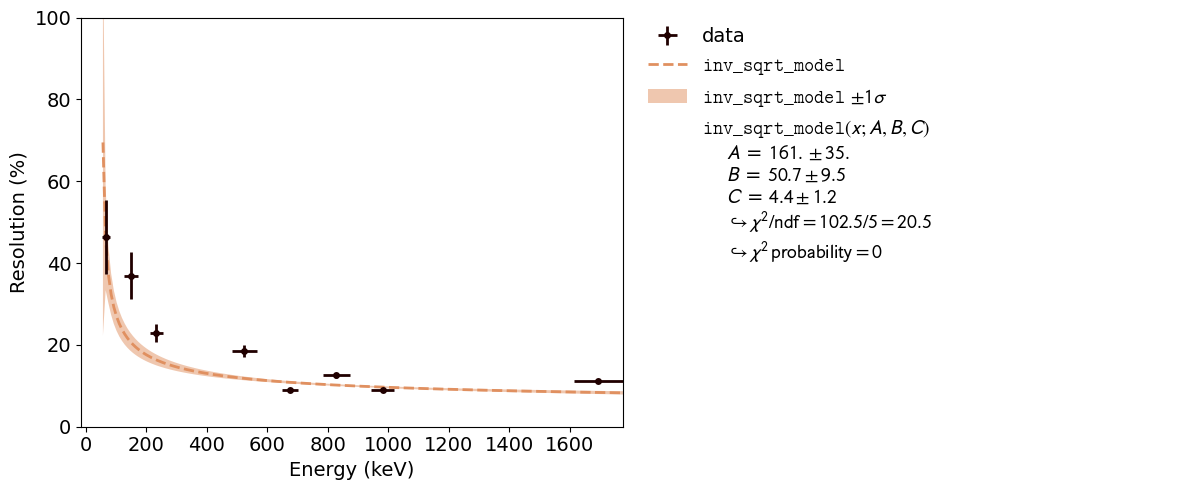

In [9]:
resolutionData = determine_resolution(peakfits)